In [1]:
import cv2 as cv

from matplotlib import pyplot as plt

import numpy as np

In [2]:
nonoise_vid = cv.VideoCapture('./1tagvideo.mp4')
if (nonoise_vid.isOpened() == False):
	print("Error opening the video file")
else:
  # Get frame rate information

  fps = int(nonoise_vid.get(5))
  print("Frame Rate : ",fps,"frames per second")	

  # Get frame count
  frame_count = nonoise_vid.get(7)
  print("Frame count : ", frame_count)


Frame Rate :  26 frames per second
Frame count :  787.0


In [3]:
frames = []
while(nonoise_vid.isOpened()):
	# nonoise_vid.read() methods returns a tuple, first element is a bool 
	# and the second is frame
  ret, frame = nonoise_vid.read()
  if ret == True:
    #Split the channels and invert color of the frame as we are only interested in the red channel
    frames.append(frame)
  else:
    break

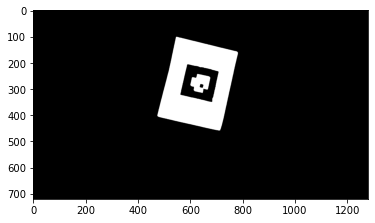

In [4]:
img= cv.cvtColor(frames[0],cv.COLOR_BGR2GRAY)
img = cv.medianBlur(img,5)
img = cv.resize(img,(1280,720))
img = np.float32(img>150)
plt.imshow(img,"gray")

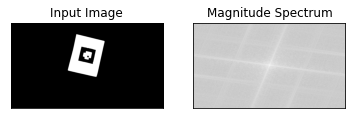

In [5]:
# img = cv.cvtColor(frames[0], cv.COLOR_BGR2GRAY)
ifft1 = np.fft.ifftshift(img)
f = np.fft.fft2(ifft1)
fshift = np.fft.fftshift(f)
# magnitude_spectrum = 20*np.log(np.abs(fshift))
magnitude_spectrum = np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [48]:
rows, cols = fshift.shape[0], fshift.shape[1]
x_c, y_c = int(fshift.shape[0]/2),int(fshift.shape[1]/2)
size1 = 200
size2 = 500
bp_mask = np.ones(fshift.shape)
xgrid,ygrid = np.ogrid[:rows,:cols]
mask_hp = (xgrid-x_c)**2 + (ygrid-y_c)**2 <= size1**2
mask_lp = (xgrid-x_c)**2 + (ygrid-y_c)**2 >= size2**2
bp_mask[mask_hp] = 0
bp_mask[mask_lp] = 0


edge_image = (fshift*bp_mask)
edge_image = np.fft.ifft2(edge_image)
edge_image = np.fft.ifftshift(edge_image)
edge_image = np.log(np.abs(edge_image))
edge_image = np.float32(np.abs(edge_image)<2)

In [49]:
np.max(np.abs(edge_image))

1.0

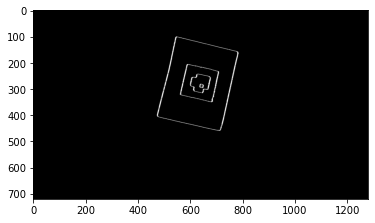

In [50]:
# edge_image_dial = cv.morphologyEx(edge_image,cv.MORPH_CLOSE,np.ones((10,10),np.uint8),iterations = 1)

plt.imshow(np.abs(edge_image),"gray")

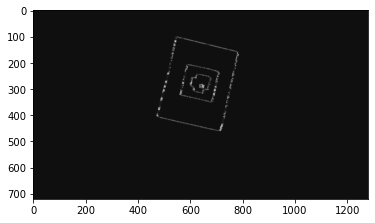

In [51]:
img = cv.cornerHarris(np.float32(edge_image),2,3,0.04)
img = cv.dilate(img,None)
plt.imshow(img,"gray")

In [52]:
img = 

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 13207 output values where the mask is true